In [1]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("Most popular 1000 Youtube videos.csv")

# Вывод первых строк данных
print(df.head())



   rank                                              Video    Video views  \
0     1  Lil Nas X - Old Town Road (Official Movie) ft....     54,071,677   
1     2  20 Tennis shots if they were not filmed, NOBOD...      3,471,237   
2     3                 JoJo Siwa - Karma (Official Video)     34,206,747   
3     4    David Kushner - Daylight (Official Music Video)     18,558,390   
4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...  6,547,981,039   

        Likes Dislikes Category  published  
0   3,497,955   78,799    Music       2019  
1      19,023      859      NaN       2017  
2     293,563      NaN    Music       2024  
3     680,732      NaN    Music       2023  
4  44,428,537      NaN    Music       2015  


In [2]:
# Удаление строк с пропусками
df = df.dropna()

# Проверка результата
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         511 non-null    int64 
 1   Video        511 non-null    object
 2   Video views  511 non-null    object
 3   Likes        511 non-null    object
 4   Dislikes     511 non-null    object
 5   Category     511 non-null    object
 6   published    511 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.9+ KB
None


In [3]:
from sklearn.model_selection import train_test_split

# Признаки (X) и целевая переменная (y)
X = df[['Video views', 'Likes', 'Dislikes']]  # Используем числовые признаки
y = df['Category']  # Целевая переменная

# Преобразуем числовые признаки из строк в числа
X['Video views'] = X['Video views'].str.replace(',', '').astype(int)
X['Likes'] = X['Likes'].str.replace(',', '').astype(int)
X['Dislikes'] = X['Dislikes'].str.replace(',', '').astype(int)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров выборок
print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}")

Обучающая выборка: (408, 3), Тестовая выборка: (103, 3)


/var/folders/cw/4tjd167j4wz1b2l6dw4jq1zh0000gn/T/ipykernel_8950/3342126156.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Video views'] = X['Video views'].str.replace(',', '').astype(int)
/var/folders/cw/4tjd167j4wz1b2l6dw4jq1zh0000gn/T/ipykernel_8950/3342126156.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Likes'] = X['Likes'].str.replace(',', '').astype(int)
/var/folders/cw/4tjd167j4wz1b2l6dw4jq1zh0000gn/T/ipykernel_8950/3342126156.py:10: SettingWithCopyWarning: 
A value is trying to be s

In [4]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Модель 1: Бэггинг

Accuracy бэггинга: 0.3883495145631068
Матрица ошибок бэггинга:


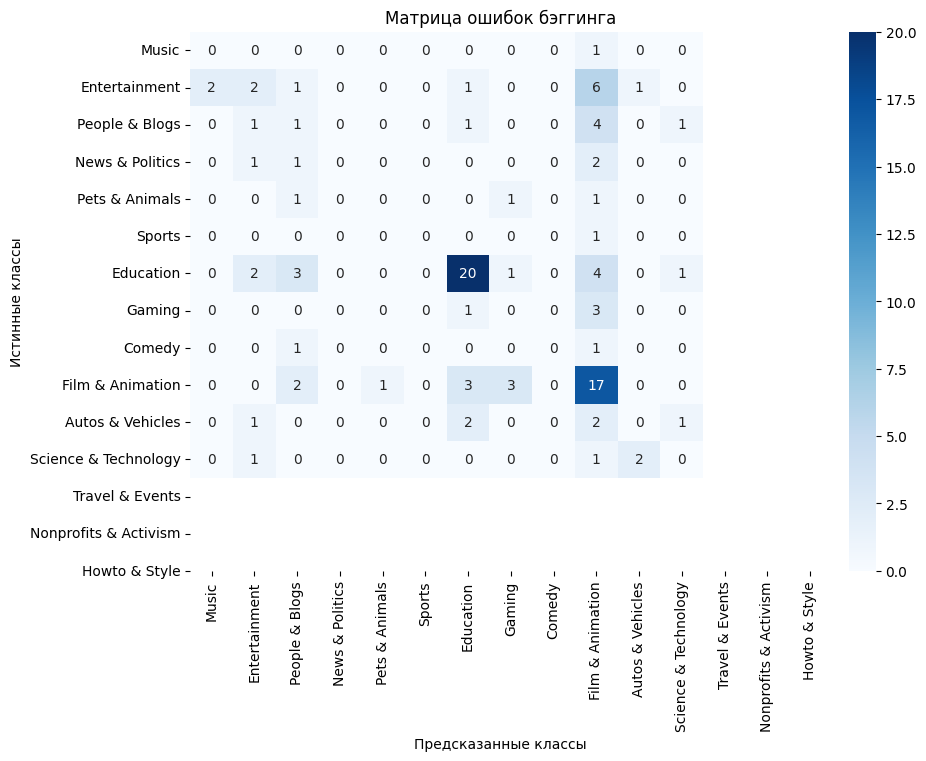

In [5]:
# Создаем базовую модель (дерево решений)
base_model = DecisionTreeClassifier()

# Создаем модель бэггинга
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=100, random_state=42)

# Обучаем модель
bagging_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_bagging = bagging_model.predict(X_test)

# Оценка качества
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy бэггинга: {accuracy_bagging}")
print("Матрица ошибок бэггинга:")
# print(confusion_matrix(y_test, y_pred_bagging))


def plot_confusion_matrix(y_true, y_pred, title='Матрица ошибок'):
    # Вычисляем матрицу ошибок
    cm = confusion_matrix(y_true, y_pred)
    
    # Создаем heatmap для визуализации
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.show()

# Получаем имена классов (если они есть)
class_names = y.unique()

# Отрисовка матрицы ошибок для бэггинга
plot_confusion_matrix(y_test, y_pred_bagging, title='Матрица ошибок бэггинга')

Модель 2: Случайный лес

Accuracy случайного леса: 0.4174757281553398
Матрица ошибок случайного леса:


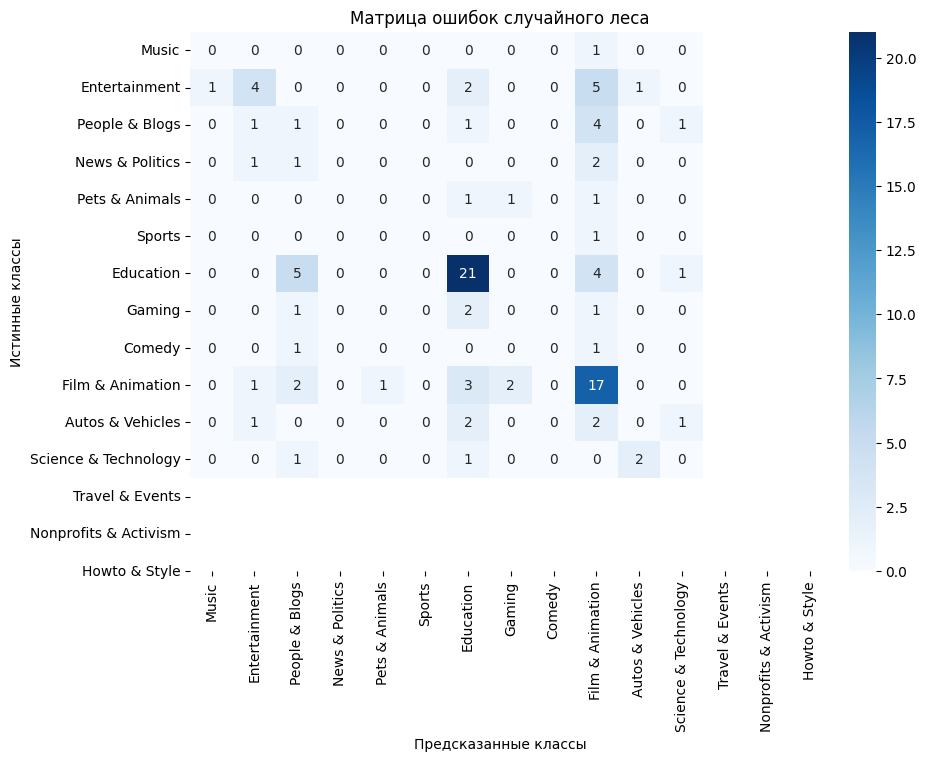

In [6]:
# Создаем модель случайного леса
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель
random_forest_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_rf = random_forest_model.predict(X_test)

# Оценка качества
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy случайного леса: {accuracy_rf}")
print("Матрица ошибок случайного леса:")
# print(confusion_matrix(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, title='Матрица ошибок случайного леса')

Обучение модели AdaBoost

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy AdaBoost: 0.3300970873786408
Матрица ошибок AdaBoost:


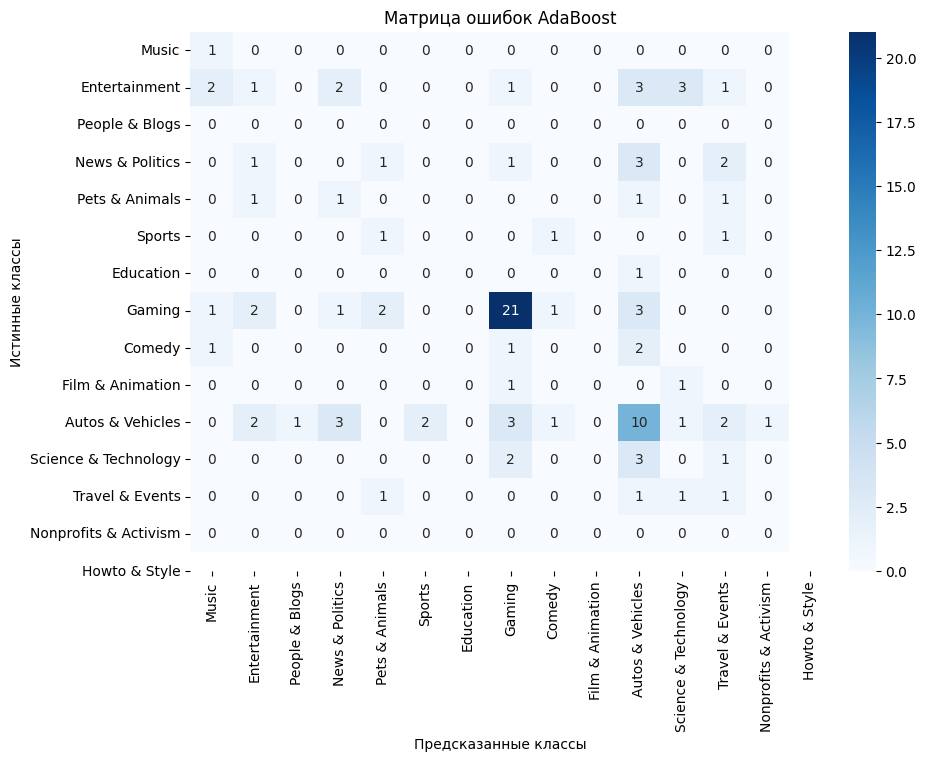

In [7]:
# Создаем модель AdaBoost
adaboost_model = AdaBoostClassifier(estimator=base_model, n_estimators=100, random_state=42)

# Обучаем модель
adaboost_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_adaboost = adaboost_model.predict(X_test)

# Оценка качества
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy AdaBoost: {accuracy_adaboost}")
print("Матрица ошибок AdaBoost:")
# print(confusion_matrix(y_test, y_pred_adaboost))
plot_confusion_matrix(y_test, y_pred_adaboost, title='Матрица ошибок AdaBoost')

Обучение модели градиентного бустинга

Accuracy градиентного бустинга: 0.33980582524271846
Матрица ошибок градиентного бустинга:


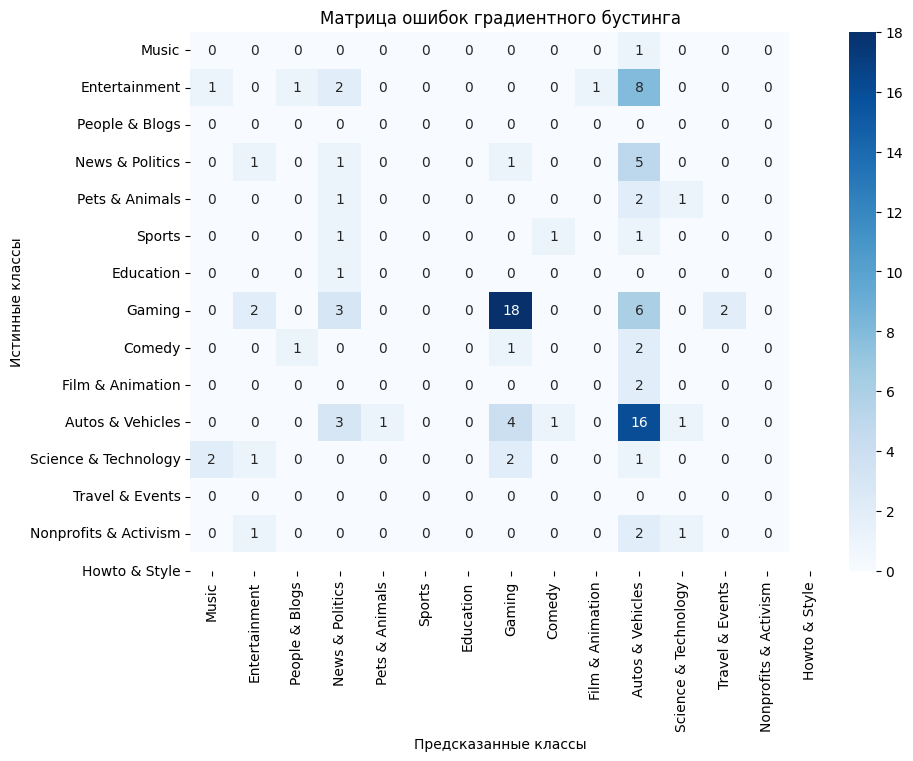

In [8]:
# Создаем модель градиентного бустинга
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Обучаем модель
gradient_boosting_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_gb = gradient_boosting_model.predict(X_test)

# Оценка качества
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy градиентного бустинга: {accuracy_gb}")
print("Матрица ошибок градиентного бустинга:")
# print(confusion_matrix(y_test, y_pred_gb))
plot_confusion_matrix(y_test, y_pred_gb, title='Матрица ошибок градиентного бустинга')


Сравнение моделей

In [9]:
print(f"Accuracy бэггинга: {accuracy_bagging}")
print(f"Accuracy случайного леса: {accuracy_rf}")
print(f"Accuracy AdaBoost: {accuracy_adaboost}")
print(f"Accuracy градиентного бустинга: {accuracy_gb}")

Accuracy бэггинга: 0.3883495145631068
Accuracy случайного леса: 0.4174757281553398
Accuracy AdaBoost: 0.3300970873786408
Accuracy градиентного бустинга: 0.33980582524271846
